# Aula 4 - Amostragem e Correlações

## **Amostragem**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
world_happiness = pd.read_csv('data/world_happiness.csv')

In [ ]:
world_happiness.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [ ]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       143 non-null    int64  
 1   country          143 non-null    object 
 2   social_support   142 non-null    float64
 3   freedom          142 non-null    float64
 4   corruption       135 non-null    float64
 5   generosity       142 non-null    float64
 6   gdp_per_cap      143 non-null    int64  
 7   life_exp         143 non-null    float64
 8   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 10.2+ KB


In [ ]:
np.random.seed(3)

In [ ]:
world_happiness.sample(10, replace=True)

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
25,26,Guatemala,78.0,25.0,82.0,78.0,7610,73.1,129
115,116,Sierra Leone,135.0,116.0,112.0,79.0,1460,61.3,27
26,27,Saudi Arabia,62.0,68.0,NaN,82.0,48100,77.1,128
76,77,Mongolia,10.0,112.0,119.0,38.0,12800,69.3,73
11,12,Costa Rica,42.0,16.0,58.0,75.0,15800,79.8,144
30,31,Brazil,43.0,84.0,71.0,108.0,14300,75.9,124
79,80,Algeria,101.0,149.0,46.0,128.0,14000,78.1,68
131,132,Burundi,152.0,135.0,23.0,149.0,644,62.3,11
70,71,Croatia,79.0,118.0,139.0,81.0,24500,78.8,81
46,47,Ecuador,71.0,42.0,68.0,95.0,10200,77.2,106


In [ ]:
world_happiness.sample(10)

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
130,131,Lesotho,98.0,97.0,59.0,151.0,2920,56.1,12
76,77,Mongolia,10.0,112.0,119.0,38.0,12800,69.3,73
125,126,Togo,149.0,120.0,72.0,131.0,1610,65.0,17
38,39,Uzbekistan,11.0,1.0,18.0,29.0,6490,70.7,115
16,17,Germany,39.0,44.0,17.0,19.0,46200,80.9,139
67,68,Libya,73.0,79.0,31.0,87.0,14800,73.3,84
31,32,Uruguay,35.0,30.0,33.0,80.0,20900,77.3,123
111,112,Tunisia,121.0,143.0,101.0,144.0,11100,78.7,32
61,62,Portugal,47.0,37.0,135.0,122.0,29300,81.8,90
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154


## **Correlação e Design de Experimentos**
Neste capítulo vamos aprender como quantificar a força de uma relação linear entre duas variáveis e explorar como variáveis confusas podem afetar a relação entre elas. Também veremos como o plano de um estudo pode influenciar seus resultados, modificar o modo como os dados devem ser analisados, e potencialmente afetar a confiança de suas conclusões.

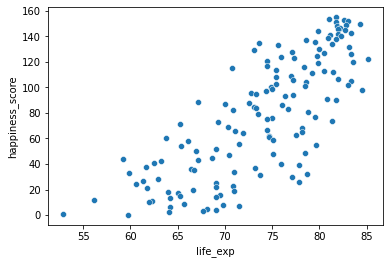

In [ ]:
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)
plt.show()

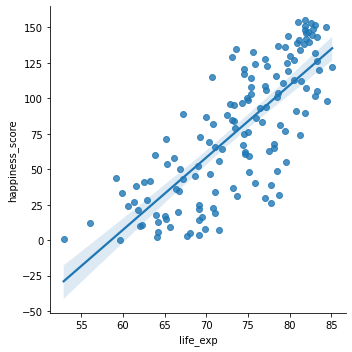

In [ ]:
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness)
plt.show()

In [ ]:
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
print(cor)

0.7802249053272062


#### Correlação de Pearson, Kendall e Spearman
Qual método utilizar?

**Pearson**
- Paramétrico
- Valores numéricos contínuos (flutuantes);
- Distribuição normal (histograma simétrico);
- Relação linear (formando uma reta onde os pontos se acumulam);
- Ausência de outliers (estes devem ser tratados previamente, pois afetam diretamente o coeficiente de correlação);

**Kendall e Spearman**
- Não paramétrico
- Valores numéricos contínuos (flutuantes) ou discretos (integrais);
- Distribuição não-normal, presença de outliers;
- Não requer consistência de intervalos;
- O primeiro é mais robusto que o segundo;

In [5]:
cor = world_happiness.corr(method='pearson')
cor

,Unnamed: 0,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
Unnamed: 0,1.000000,0.823994,0.570802,0.221393,0.501447,-0.729362,-0.779613,-0.999704
social_support,0.823994,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.570802,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.221393,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.501447,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.729362,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.779613,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.999704,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


In [ ]:
cor = world_happiness.corr(method='kendall')
cor

,Unnamed: 0,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
Unnamed: 0,1.000000,0.625612,0.408850,0.134992,0.352312,-0.627291,-0.583063,-1.000000
social_support,0.625612,1.000000,0.339327,0.098286,0.302767,-0.598221,-0.512139,-0.625612
freedom,0.408850,0.339327,1.000000,0.264566,0.335731,-0.286871,-0.269684,-0.408850
corruption,0.134992,0.098286,0.264566,1.000000,0.190050,-0.093895,-0.098167,-0.134992
generosity,0.352312,0.302767,0.335731,0.190050,1.000000,-0.327638,-0.298714,-0.352312
gdp_per_cap,-0.627291,-0.598221,-0.286871,-0.093895,-0.327638,1.000000,0.672098,0.627291
life_exp,-0.583063,-0.512139,-0.269684,-0.098167,-0.298714,0.672098,1.000000,0.583063
happiness_score,-1.000000,-0.625612,-0.408850,-0.134992,-0.352312,0.627291,0.583063,1.000000


In [ ]:
cor = world_happiness.corr(method='spearman')
cor

,Unnamed: 0,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
Unnamed: 0,1.000000,0.822838,0.571958,0.211389,0.495946,-0.822026,-0.789545,-1.000000
social_support,0.822838,1.000000,0.474982,0.158307,0.446150,-0.795307,-0.703266,-0.822838
freedom,0.571958,0.474982,1.000000,0.385718,0.489324,-0.416685,-0.387847,-0.571958
corruption,0.211389,0.158307,0.385718,1.000000,0.293566,-0.163732,-0.156077,-0.211389
generosity,0.495946,0.446150,0.489324,0.293566,1.000000,-0.475764,-0.440401,-0.495946
gdp_per_cap,-0.822026,-0.795307,-0.416685,-0.163732,-0.475764,1.000000,0.862144,0.822026
life_exp,-0.789545,-0.703266,-0.387847,-0.156077,-0.440401,0.862144,1.000000,0.789545
happiness_score,-1.000000,-0.822838,-0.571958,-0.211389,-0.495946,0.822026,0.789545,1.000000


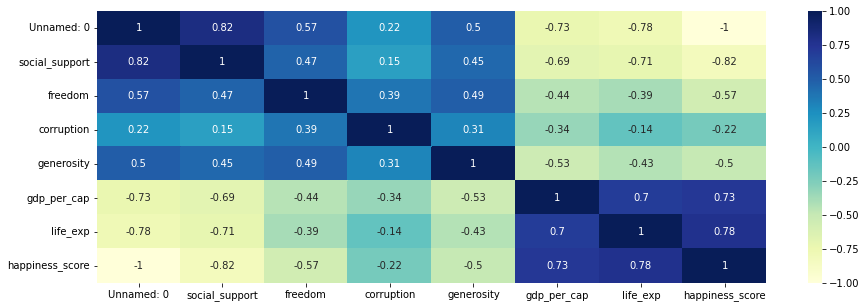

In [ ]:
plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(world_happiness.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Matriz de Correlação', fontdict={'fontsize':12}, pad=12)
plt.show()

### **Correlação**
O coeficiente de correlação
- Quantifica a relação linear entre duas variáveis;
- É um valor flutuante entre -1 e 1;
- Sua magnitude corresponde à força da relação;
- O valor (positivo ou negativo) corresponde à direção da relação

#### **Relações Entre Variáveis**
Neste capítulo, trabalharemos com a base de dados world_happiness, contendo os resultados do Relatório de Felicidade Mundial 2019. O relatório pontua a felicidade das pessoas em cada país, a partir de uma série de aspectos como apoio social, liberdade, corrupção, entre outros. A base de dados também inclui o GDP per capita e a expectativa de vida de cada país. Neste exercício, vamos examinar a relação entre expectativa de vida e felicidade.

### **Precauções**
- A correlação considera apenas relações lineares.

- Transformação
  - Alguns métodos estatísticos dependem da relação linear entre variáveis.
     - Coeficiente de correlação
     - Regressão linear

- Correlação não implica causalidade
   - a correlação entre x e y não significa que x cause y, ou vice-versa.


### O que não pode ser medido pela correlação?
Embora a correlação seja uma maneira conveniente de quantificar a força de uma relação entre duas variáveis, está longe da perfeição. Neste exercício, vamos explorar uma das precauções do coeficiente de correlação examinando a correlação entre o GDP percapita e a expectativa de vida.

0.7019547642148012


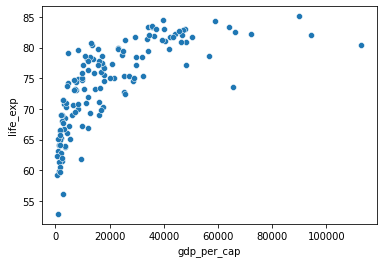

In [ ]:
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])
print(cor)

0.727973301222298


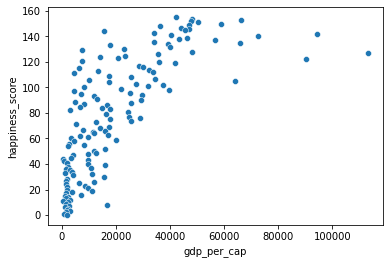

In [ ]:
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

In [ ]:
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

In [ ]:
world_happiness.sample(5)

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score,log_gdp_per_cap
127,128,Liberia,127.0,94.0,126.0,110.0,1140,65.2,15,7.038784
27,28,Qatar,NaN,NaN,NaN,NaN,113000,80.5,127,11.635143
57,58,Bolivia,93.0,35.0,91.0,104.0,7150,73.3,95,8.874868
45,46,Cyprus,90.0,81.0,115.0,39.0,34500,82.0,107,10.448715
142,143,South Sudan,148.0,154.0,61.0,85.0,1860,59.7,0,7.528332


0.8043146004918288


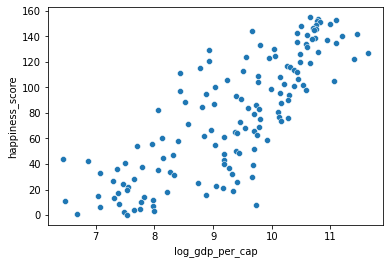

In [ ]:
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

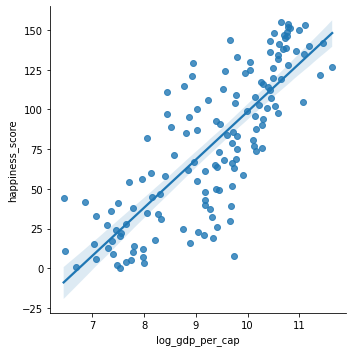

In [ ]:
sns.lmplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

### Transformando Variáveis
Quando variáveis possuem distribuições assimétricas, normalmente é necessário que se faça algum tipo de transformação nos dados para que se possa medir a correlação. No exercício abaixo, faremos a transformação 

### Açúcar Aumenta a Felicidade?
Adicionamos uma nova coluna chamada gramas de açúcar por dia, que contém a média de açúcar consumido por pessoa/dia em cada país. Nesse exercício vamos examinar a relação do consumo de açúcar e a felicidade

In [10]:
world_sugar_happy = pd.read_csv('/content/drive/MyDrive/Analise_Estatistica/dataset/world_happiness_sugar.csv')

In [12]:
world_sugar_happy.sample(10)

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score,grams_sugar_per_day
73,73,Nigeria,111,75,114.0,59,5300,65.2,71,29.4
127,127,Malawi,150,65,64.0,109,1180,64.2,6,22.6
85,85,Nepal,87,67,65.0,46,2880,71.5,56,13.0
112,112,Chad,141,142,80.0,106,1740,60.6,24,29.1
114,114,Ethiopia,119,106,53.0,99,1900,69.1,22,18.1
11,11,Costa Rica,42,16,58.0,75,15800,79.8,144,144.0
4,4,Netherlands,15,19,12.0,7,50500,81.8,151,122.0
89,89,South Africa,63,85,102.0,89,12000,66.9,50,101.0
92,92,Cambodia,109,2,94.0,61,4080,70.4,47,51.5
107,107,Iraq,124,130,66.0,73,15700,77.1,30,52.8


0.6939100021829633


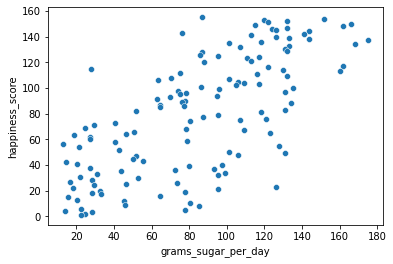

In [13]:
sns.scatterplot(x='grams_sugar_per_day', y='happiness_score', data=world_sugar_happy)
cor = world_sugar_happy['grams_sugar_per_day'].corr(world_sugar_happy['happiness_score'])
print(cor)

### Atividade 04

- Importar base de dados world_happiness_sugar
- Verificar a distribuição dos dados (histograma) de 'social_support' e 'grams_sugar_per_day' 
- Calcular a correlação destas variáveis com o 'happiness_score' utilizando o método que julgar mais adequado;
- Plotar os gráficos de dispersão com a linha de tendência para conferir a linearidade dos dados;
- Caso necessário, transformar os dados utilizando np.log e plotar os gráficos novamente;
- Descrever os resultados observados;

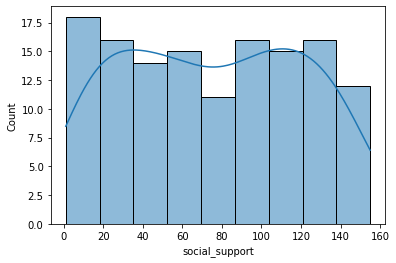

In [17]:
sns.histplot(x='social_support', data=world_sugar_happy, kde=True)
plt.show()

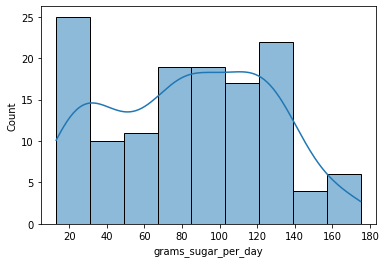

In [18]:
sns.histplot(x='grams_sugar_per_day', data=world_sugar_happy, kde=True)
plt.show()

Como os dados não apresentam distribuição normal, optou-se pelos métodos de correlação não-paramétricos

In [27]:
cor = world_happiness.corr(method='kendall')
cor

,Unnamed: 0,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
Unnamed: 0,1.000000,0.625612,0.408850,0.134992,0.352312,-0.627291,-0.583063,-1.000000
social_support,0.625612,1.000000,0.339327,0.098286,0.302767,-0.598221,-0.512139,-0.625612
freedom,0.408850,0.339327,1.000000,0.264566,0.335731,-0.286871,-0.269684,-0.408850
corruption,0.134992,0.098286,0.264566,1.000000,0.190050,-0.093895,-0.098167,-0.134992
generosity,0.352312,0.302767,0.335731,0.190050,1.000000,-0.327638,-0.298714,-0.352312
gdp_per_cap,-0.627291,-0.598221,-0.286871,-0.093895,-0.327638,1.000000,0.672098,0.627291
life_exp,-0.583063,-0.512139,-0.269684,-0.098167,-0.298714,0.672098,1.000000,0.583063
happiness_score,-1.000000,-0.625612,-0.408850,-0.134992,-0.352312,0.627291,0.583063,1.000000


In [24]:
cor = world_happiness.corr(method='spearman')
cor

,Unnamed: 0,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
Unnamed: 0,1.000000,0.822838,0.571958,0.211389,0.495946,-0.822026,-0.789545,-1.000000
social_support,0.822838,1.000000,0.474982,0.158307,0.446150,-0.795307,-0.703266,-0.822838
freedom,0.571958,0.474982,1.000000,0.385718,0.489324,-0.416685,-0.387847,-0.571958
corruption,0.211389,0.158307,0.385718,1.000000,0.293566,-0.163732,-0.156077,-0.211389
generosity,0.495946,0.446150,0.489324,0.293566,1.000000,-0.475764,-0.440401,-0.495946
gdp_per_cap,-0.822026,-0.795307,-0.416685,-0.163732,-0.475764,1.000000,0.862144,0.822026
life_exp,-0.789545,-0.703266,-0.387847,-0.156077,-0.440401,0.862144,1.000000,0.789545
happiness_score,-1.000000,-0.822838,-0.571958,-0.211389,-0.495946,0.822026,0.789545,1.000000


Para continuidade da análise, preferimos adotar o método de spearman, pois enfatiza melhor a correlação entre as variáveis que o método kendall

0.6891139124272058


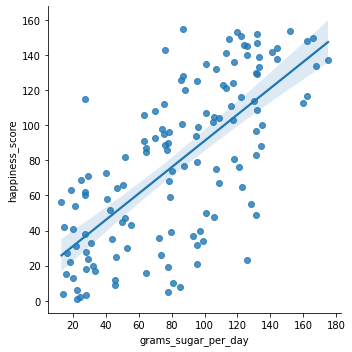

In [25]:
sns.lmplot(x='grams_sugar_per_day', y='happiness_score', data=world_sugar_happy)
cor = world_sugar_happy['grams_sugar_per_day'].corr(world_sugar_happy['happiness_score'], method='spearman')
print(cor)

Existe uma correlação linear positiva entre as variáveis happiness_score e grams_sugar_per_day. Isto sugere que em países onde o consumo de açúcar é maior, a felicidade das pessoas também é maior. Alguns estudos sugerem que o consumo de açúcar conduz ao estímulo direto do cérebro ativando a liberação da dopamina, neurotransmissora do bem-estar. Entretanto, com base nos dados observados, é impossível avaliar se existe de fato algum impacto de uma variável na outra, sendo necessário um estudo mais aprofundado para verificar a relação de causalidade entre as duas variáveis.

-0.8111323083828975


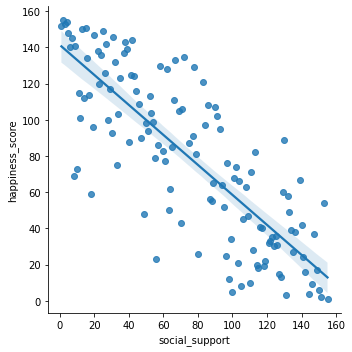

In [26]:
sns.lmplot(x='social_support', y='happiness_score', data=world_sugar_happy)
cor = world_sugar_happy['social_support'].corr(world_sugar_happy['happiness_score'], method='spearman')
print(cor)

Existe uma correlação linear negativa entre as variáveis happiness_score e social_support. Isto sugere que em países onde o apoio social é maior, a felicidade é menor. É possível que a causa da infelicidade das pessoas esteja atrelada às questões que demandam apoio social. Porém, também é possível que as populações mais felizes percebam menos o apoio social que possuem. Assim, seriam necessários estudos mais aprofundados para avaliar se de fato o apoio social tem impacto negativo na felicidade das pessoas.